# 二元线性回归分析

二元，有两组数据；线性，数据($a_1, a_2, a_3, ..., a_n$)之间的关系，可以用公式$a_1b_1+a_2b_2+...+a_nb_n+b_0=0$进行表示；回归，建立数据之间的关系就叫做回归，对于二元数据，公式表示即为$Y=f(X)$，其中X为自变量，Y为因变量或响应变量。

## 问题

下表中给出了某地区8名儿童年龄（岁）和尿肌酐（mmol/24h）。

| 编号 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| ---- |--|---|----|---|---|---|--|---|
| 年龄X |13 | 11 | 9 | 6 | 8 | 10 | 12 | 7 |
| 尿肌酐含量Y | 3.54 | 3.01 | 3.09 | 2.48 | 2.56 | 3.36 | 3.18 | 2.65 |

问：该地区儿童的年龄和尿肌酐含量之间是否有某种关系？

## 数据展示

为了直观的观察数据之间的关系，我散点图进行绘制


In [26]:
# python imports
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib as mpl

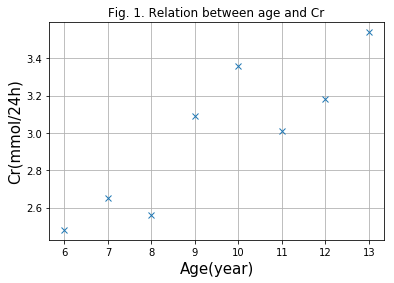

In [5]:
# Plot relation between X and Y
X = np.array([13, 11, 9, 6, 8, 10, 12, 7])
Y = np.array([3.54, 3.01, 3.09, 2.48, 2.56, 3.36, 3.18, 2.65])
plt.plot(X,Y,'x')
plt.xlabel('Age(year)', fontsize=15)
plt.ylabel('Cr(mmol/24h)', fontsize=15)
plt.title('Fig. 1. Relation between age and Cr')
plt.grid()

## 直线回归方程
从图标中可以看到，两者之间的关系可能是线性相关的。那么，我们就可以知道两者之间的关系可以表示为：

$$\hat{Y}=f(X)=aX+b\mbox{ (1)}$$

其中$X$表示表中的**年龄**，$\hat{Y}$表示通过线性方程估计得到的对应**年龄**下的**尿肌酐**的含量，$a$和$b$分别表示需要求的斜率与截距。$Y$表示表中实际的尿肌酐的含量。
$a$和$b$的求解可以通过多种方式实现。此处介绍了两种：1. 基于算式的，2. 基于多步逼近。

### 基于算式求解

求解$\hat{Y}=aX+b$对$Y$最准确的估计，就是需要使得预估值和实际值之间的距离最小，即：使得

$$\delta=\sum(\hat{Y}-Y)^2\mbox{ (2)}$$

达到最小。关于函数最小值的求解，可以联想到**导数**，又因为此处有两个未知变量，可以进一步联想到**偏导**函数$a$,$b$进行求导，得：

$$\frac{\partial\delta}{\partial a}=2\sum{(\hat{Y}-Y)\frac{\partial\hat{Y}}{\partial a}}=2\sum{(aX+b-Y)X}\mbox{  (3)}$$

$$\frac{\partial\delta}{\partial b}=2\sum(\hat{Y}-Y)\frac{\partial\hat{Y}}{\partial b}=2\sum(aX+b-Y)\mbox{  (4)}$$

从公式（2）中很容易的可以得出，$\delta$只有最小值，没有最大值。因此，当两个偏导数均为0的时候，就是$\delta$达到最小的时候。则：

$$2\sum{(aX+b-Y)X} = 2(a\sum{X^2}+b\sum{X}-\sum{XY})=0\mbox{  (5)}$$

$$2\sum{(aX+b-Y)} = 2(a\sum{X}+nb-\sum{Y})=0 \mbox{ (6)}$$

其中n为X样本的个数。对式子（5）和（6）进行求解，得：

$$a=\frac{\sum{XY}-\frac{\sum{X}\sum{Y}}{n}}{\sum{X^2}-\frac{(\sum{X})^2}{n}}\mbox{  (7)}$$

$$b=\frac{\sum{Y}}{n}-a\frac{\sum{X}}{n}\mbox{  (8)}$$

In [58]:
#Calculate using math
n = len(X)
a = (np.sum(X*Y) - (np.sum(X)*np.sum(Y))/n)/(np.sum(X*X)-np.sum(X)**2/n)
b = np.sum(Y)/n - a*np.sum(X)/n
YEstimation = a*X + b
delta = np.sum((Y-YEstimation)**2)
print("a = {}, b = {}, delta = {}".format(a, b, delta))

a = 0.13916666666666663, b = 1.661666666666667, delta = 0.23275833333333312


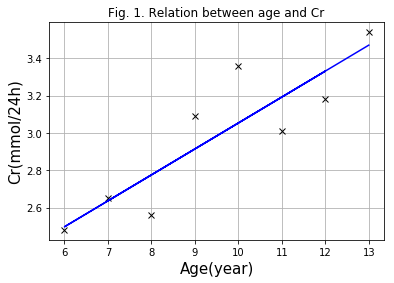

In [60]:

plt.plot(X,Y,'xk')
plt.plot(X,YEstimation, 'b')
plt.xlabel('Age(year)', fontsize=15)
plt.ylabel('Cr(mmol/24h)', fontsize=15)
plt.title('Fig. 1. Relation between age and Cr')
plt.grid()

### 基于多步逼近

在现实过程中，有很多问题，并没有像二元线性问题这么简单，能够直接通过公式求解的方式得到最优解。而是需要对要求参数的初始值进行一定的猜测，然后通过逐步优化的方式，去逼近最优解。下面就借助二元线性问题，对这个过程进行模拟。通过公式（2）和公式（1）可以得到，当$a$（或$b$）不变的时候，$\delta$和$b$(或$a$）之间是二次多项式的关系。下面可以，通过图例给出。

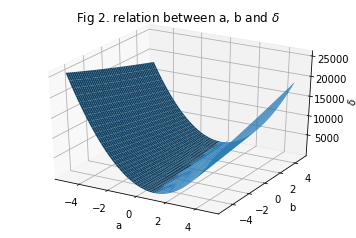

In [16]:
# \brief Get Estimate Y value from a and b
def GetEstimateY(a, b):
    return a*X + b

def GetCost(a, b):
    return np.sum((Y - GetEstimateY(a,b))**2)

a0 = np.arange(-5,5,0.2)
b0 = np.arange(-5,5,0.2)
aa0, bb0 = np.meshgrid(a0, b0)
nrow,ncol = aa0.shape
cc0 = np.zeros((nrow,ncol))
for i in range(nrow):
    for j in range(ncol):
        cc0[i,j] = GetCost(aa0[i,j], bb0[i,j])
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(aa0, bb0, cc0)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('$\delta$')
ax.set_title('Fig 2. relation between a, b and $\delta$')

多步逼近的方法：
- （1） 首先需要对a和b的初始值进行设定，令$a=3,b=2$（此处不一定是3和2,也可以是别的值）；

In [42]:
# Step 1. initialize a and b
def Step1():
    return (2, 3)

- （2） 按公式(2),(3),(4)分别求得，$\delta$,$\frac{\partial{\delta}}{\partial{a}}$,$\frac{\partial{\delta}}{\partial{b}}$;

In [41]:
# Step 2. calculate delta, deltaA, deltaB
def Step2(a, b):
    delta = GetCost(a, b)
    deltaA = 2*np.sum((a*X+b-Y)*X)
    deltaB = 2*np.sum((a*X+b-Y))
    return (delta, deltaA, deltaB)


先来看下当其中一个值固定时，另一个值和$\delta$之间的关系。

delta = 3038.608300000001, deltaA = 3046.78, deltaB = 304.26


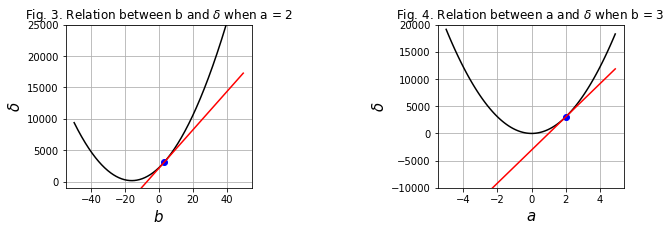

In [48]:
(a,b) = Step1()
(delta, deltaA, deltaB) = Step2(a,b)

print("delta = {}, deltaA = {}, deltaB = {}".format(delta, deltaA, deltaB))

# plot vb Vs vdelta
vb = np.arange(-50,50,0.2)
vdelta = np.zeros(vb.shape)
for ib in range(vb.shape[0]):
    vdelta[ib] = GetCost(a, vb[ib])

plt.figure(figsize=(10,3))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=1,hspace=5)
p1 = plt.subplot(gs1[0])
p2 = plt.subplot(gs1[1])
p1.plot(vb,vdelta,'k')
p1.plot(b, delta, 'bo')
p1.plot(vb, deltaB*vb+delta-deltaB*b, 'r-')
p1.set_xlabel('$b$', fontsize=15)
p1.set_ylabel('$\delta$', fontsize=15)
p1.set_title('Fig. 3. Relation between b and $\delta$ when a = 2')
p1.set_ylim([-1000,25000])
p1.grid()

# plot va Vs vdelta
va = np.arange(-5, 5, 0.1)
vdelta = np.zeros(va.shape)
for ia in range(va.shape[0]):
    vdelta[ia] = GetCost(va[ia], b)

p2.plot(va,vdelta,'k')
p2.plot(a, delta, 'bo')
p2.plot(va, deltaA*va+delta-deltaA*a, 'r-')
p2.set_xlabel('$a$', fontsize=15)
p2.set_ylabel('$\delta$', fontsize=15)
p2.set_title('Fig. 4. Relation between a and $\delta$ when b = 3')
p2.set_ylim([-10000,20000])
p2.grid()
    


Fig3显示了当a固定的时候$\delta$和$b$之间的关系，其中蓝点是对应的$(b,\delta)$。红线为该点对应的切线。那么显而易见，为了使得$\delta$达到最小值，需要让蓝色的点往谷底移动，这就是第三个步骤；

- （3） 对$a$和$b$进行调整；

为了避免错过最小值的情况，需要当点靠近最小值的时候，减小蓝点调整的步幅。而当蓝色的点越靠近最小值的时候，该点的切线的斜率越来越接近0,因此可以将斜率作为调整的幅度。为了对幅度的设置更加可控，在斜率的前面通常还加一个系数，被称为learning rate。得以下公式：

$$a'=a-lr\frac{\partial{\delta}}{\partial{a}}\mbox{  (9)}$$
$$b'=b-lr\frac{\partial{\delta}}{\partial{b}}\mbox{  (10)}$$

In [51]:
# Step 3 Adjust a and b
def Step3(a, b, deltaA, deltaB, lr):
    return (a-lr*deltaA, b-lr*deltaB)

- （4） 重复执行第二，第三步直到$\delta$达到预期值

a = 0.09160117607897046, b = 2.139552469899989, delta = 0.3331959977484201


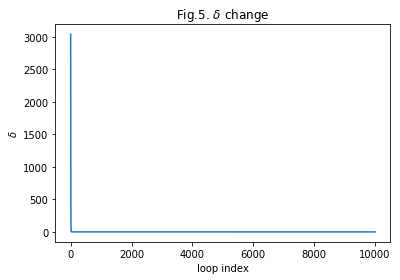

In [77]:
(a,b) = Step1()
nLoop = 10000
lr = 0.0001
(delta, deltaA, deltaB) = Step2(a,b)
vdelta = []
vdelta.append(delta)
for i in range(nLoop):
    (a, b) = Step3(a, b, deltaA, deltaB, lr)
    (delta, deltaA, deltaB) = Step2(a, b)
    vdelta.append(delta)
plt.plot(vdelta)
plt.xlabel('loop index')
plt.ylabel('$\delta$')
plt.title('Fig.5. $\delta$ change')
print("a = {}, b = {}, delta = {}".format(a, b, delta)) 
YEstimation_other = a*X + b

## 结果比对

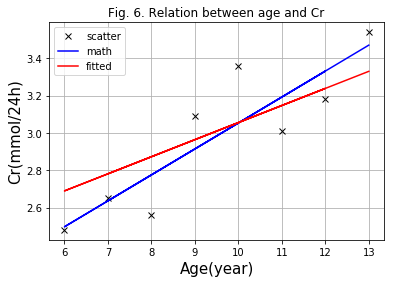

In [81]:
plt.plot(X,Y,'xk', label='scatter')
plt.plot(X,YEstimation, 'b', label='math')
plt.plot(X,YEstimation_other, 'r', label='fitted')
plt.xlabel('Age(year)', fontsize=15)
plt.ylabel('Cr(mmol/24h)', fontsize=15)
plt.legend()
plt.title('Fig. 6. Relation between age and Cr')
plt.grid()

## 尝试

可以尝试着将循环的次数进行减少和增加，可以看到两种方式得到的结果之间差异随着循环次数nLoop的增加逐渐减少。但这个减少的趋势会越来越不明显。